# 1. Dataset Visualization

## Load

In [363]:
import pandas as pd

df_test = pd.read_csv("a01_datasets/DailyDelhiClimateTest.csv", parse_dates=["date"], index_col="date")
df_train = pd.read_csv("a01_datasets/DailyDelhiClimateTrain.csv", parse_dates=["date"], index_col="date")

## Correct Typing 

In [364]:
df_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [365]:
df_train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


## Plot Time Series Data

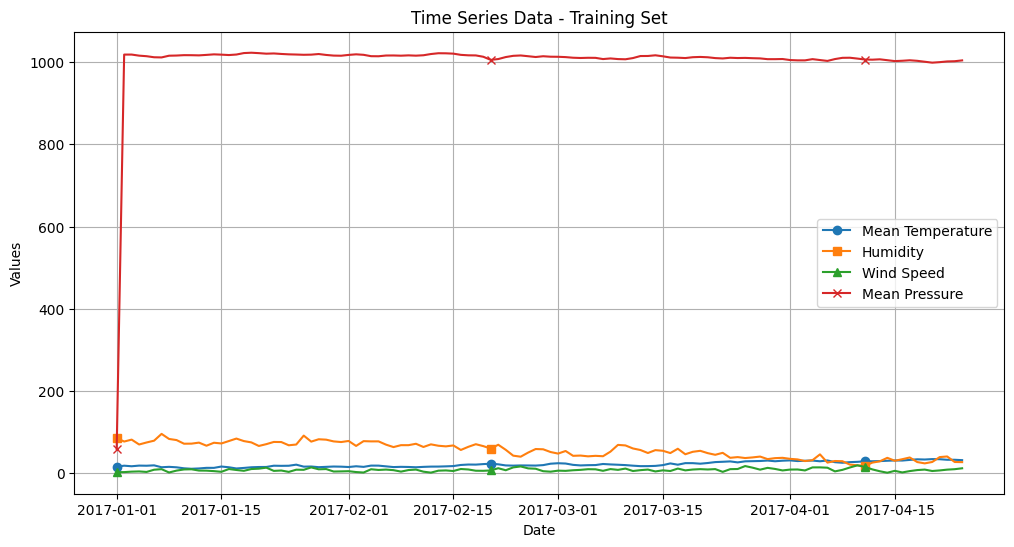

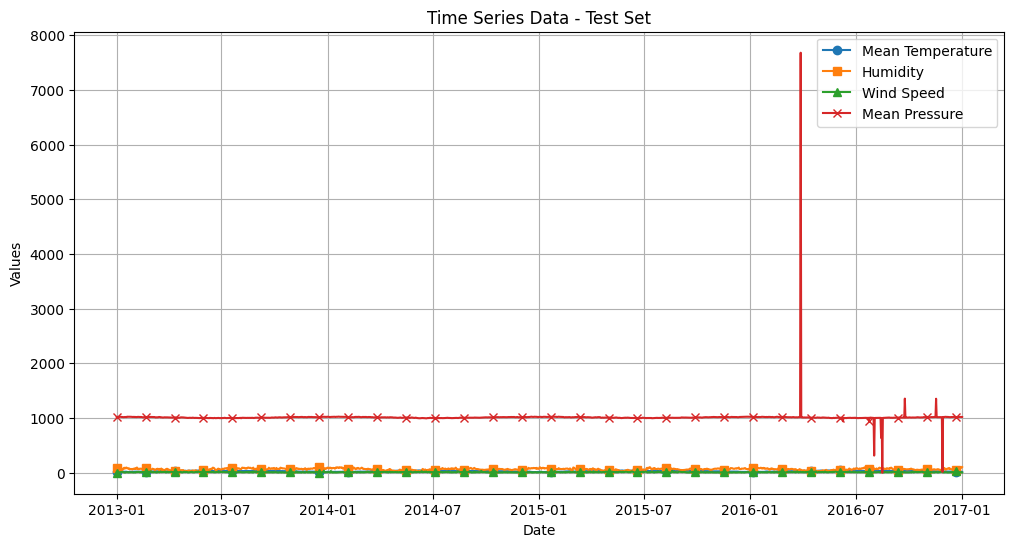

In [366]:
import matplotlib.pyplot as plt

def visualize_dataset(df_test, df_train):
    # Training data
    plt.figure(figsize=(12, 6))
    plt.plot(df_train["meantemp"], marker='o', markevery=50, linestyle='-', label="Mean Temperature")
    plt.plot(df_train["humidity"], marker='s', markevery=50, linestyle='-', label="Humidity")
    plt.plot(df_train["wind_speed"], marker='^', markevery=50, linestyle='-', label="Wind Speed")
    plt.plot(df_train["meanpressure"], marker='x', markevery=50, linestyle='-', label="Mean Pressure")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Time Series Data - Training Set")
    plt.legend()
    plt.grid(True)
    plt.show()


    # Test data
    plt.figure(figsize=(12, 6))
    plt.plot(df_test["meantemp"], marker='o', markevery=50, linestyle='-', label="Mean Temperature")
    plt.plot(df_test["humidity"], marker='s', markevery=50, linestyle='-', label="Humidity")
    plt.plot(df_test["wind_speed"], marker='^', markevery=50, linestyle='-', label="Wind Speed")
    plt.plot(df_test["meanpressure"], marker='x', markevery=50, linestyle='-', label="Mean Pressure")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Time Series Data - Test Set")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_dataset(df_train, df_test)

# 2. Statistical Analysis

## Variance

In [367]:
df_train.var()

meantemp           53.994614
humidity          281.221237
wind_speed         20.808214
meanpressure    32483.454272
dtype: float64

## Mean

In [368]:
df_train.mean()

meantemp          25.495521
humidity          60.771702
wind_speed         6.802209
meanpressure    1011.104548
dtype: float64

## Min

In [369]:
df_train.min()

meantemp         6.000000
humidity        13.428571
wind_speed       0.000000
meanpressure    -3.041667
dtype: float64

## Max

In [370]:
df_train.max()

meantemp          38.714286
humidity         100.000000
wind_speed        42.220000
meanpressure    7679.333333
dtype: float64

# 3. Introduce missing values

## Remove subset of data points from dataset

In [371]:
import numpy as np

for col in df_train.columns:
    df_train.loc[df_train.sample(frac=0.3).index, col] = np.nan
for col in df_test.columns:
    df_test.loc[df_test.sample(frac=0.3).index, col] = np.nan

df_train, df_test

(             meantemp    humidity  wind_speed  meanpressure
 date                                                       
 2013-01-01  10.000000   84.500000    0.000000   1015.666667
 2013-01-02        NaN   92.000000         NaN           NaN
 2013-01-03   7.166667   87.000000         NaN           NaN
 2013-01-04        NaN   71.333333         NaN   1017.166667
 2013-01-05   6.000000   86.833333    3.700000   1016.500000
 ...               ...         ...         ...           ...
 2016-12-28  17.217391   68.043478         NaN   1015.565217
 2016-12-29        NaN   87.857143    6.000000   1016.904762
 2016-12-30  14.095238   89.666667    6.266667           NaN
 2016-12-31  15.052632         NaN    7.325000   1016.100000
 2017-01-01  10.000000  100.000000    0.000000           NaN
 
 [1462 rows x 4 columns],
              meantemp   humidity  wind_speed  meanpressure
 date                                                      
 2017-01-01        NaN        NaN         NaN     59.000000

## Visualize dataset with inserted missing values

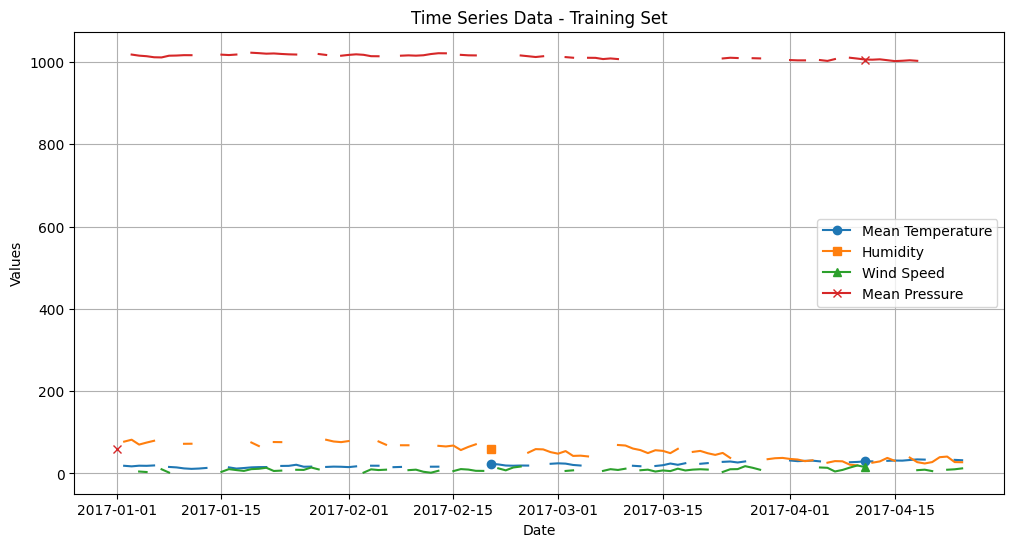

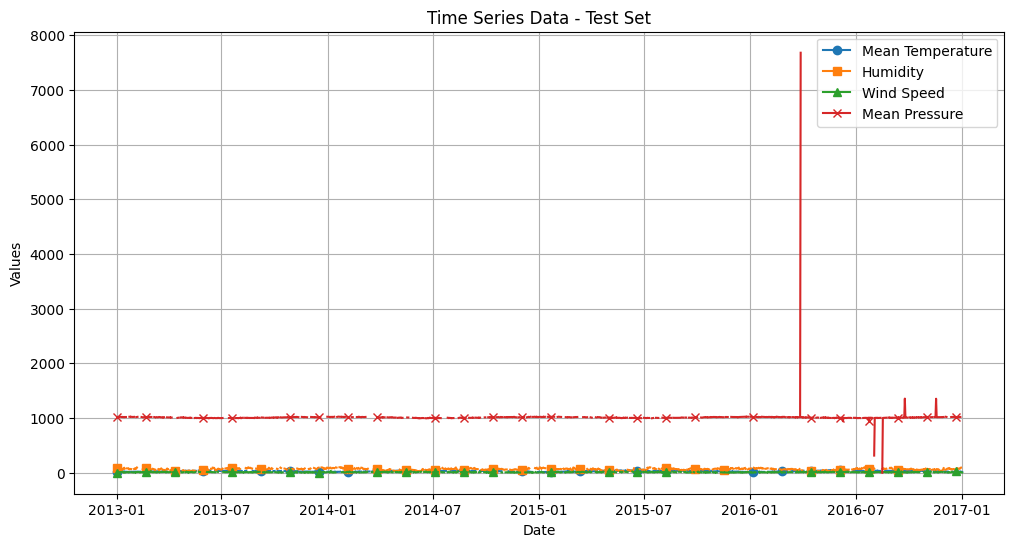

In [372]:
visualize_dataset(df_train, df_test)

# 4. Handling Missing Values

## Backwards Fill

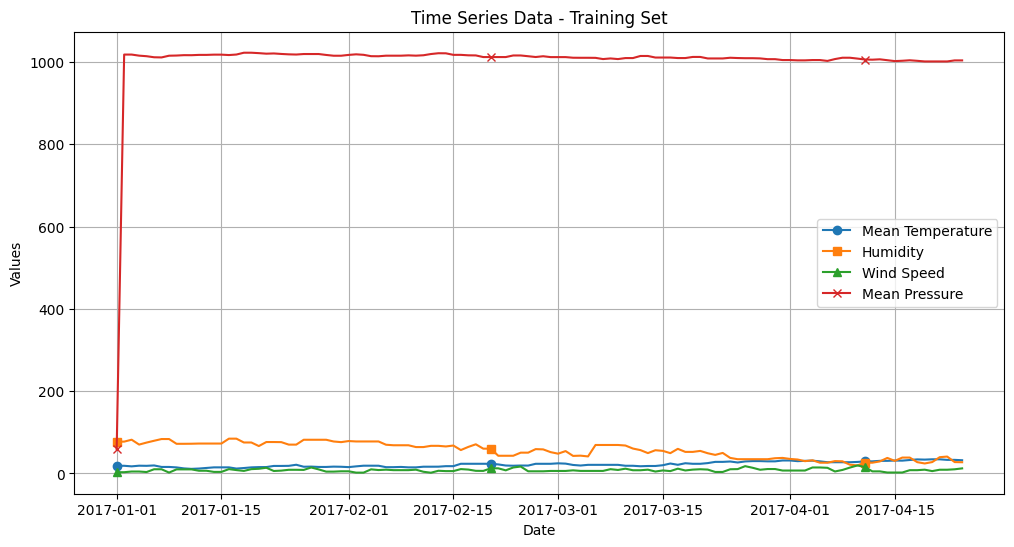

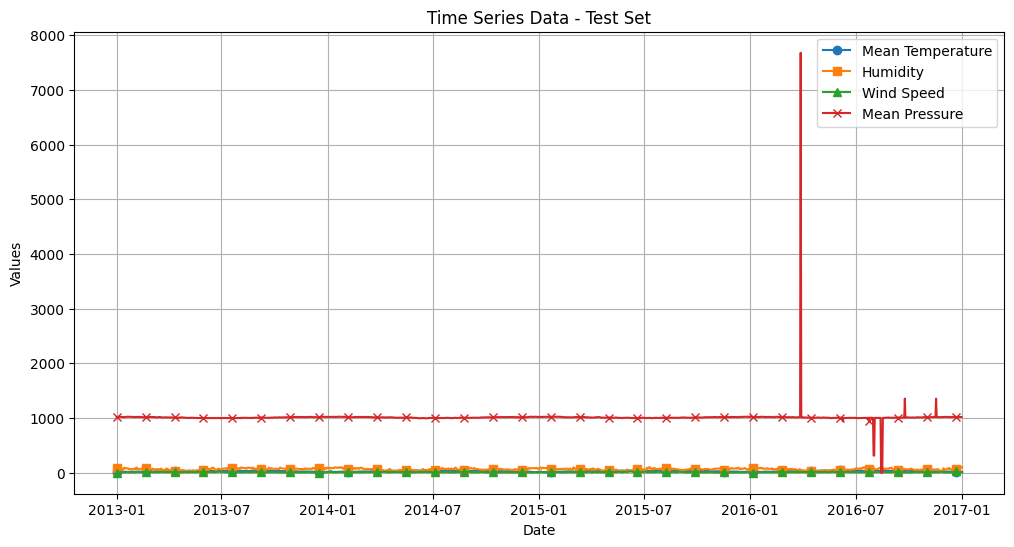

In [373]:
visualize_dataset(df_train.bfill(), df_test.bfill())

## Forward Fill

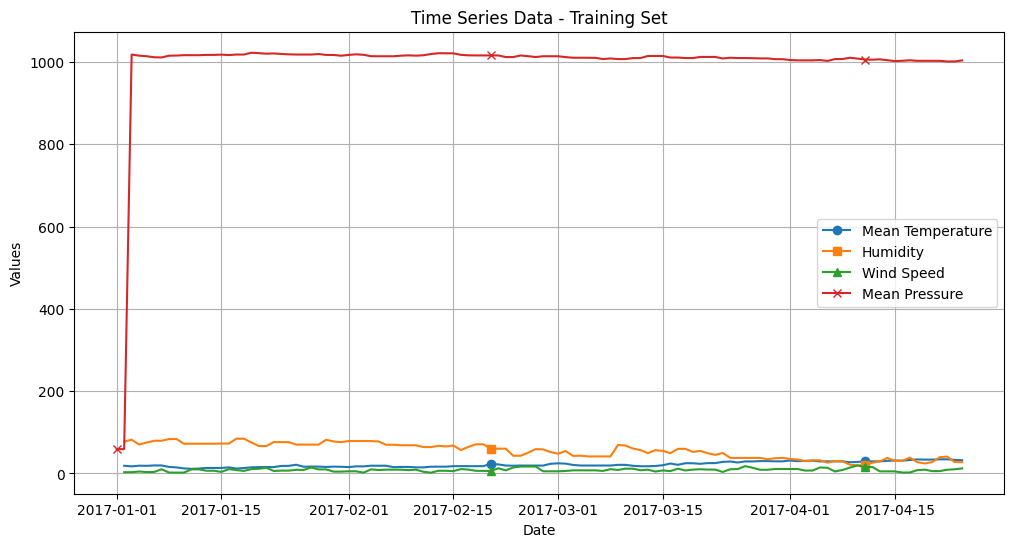

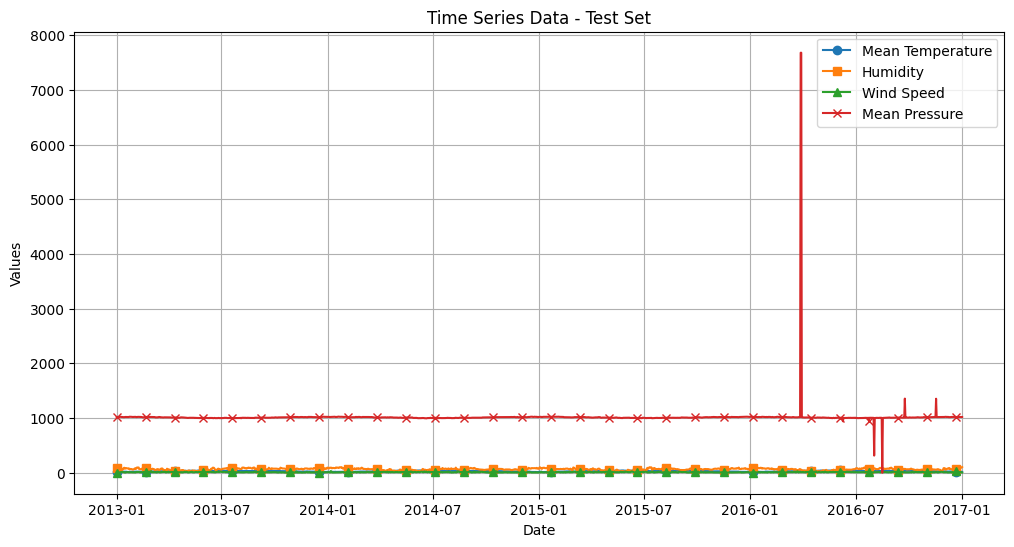

In [374]:
visualize_dataset(df_train.ffill(), df_test.ffill())

## Forward + Backwards Fill

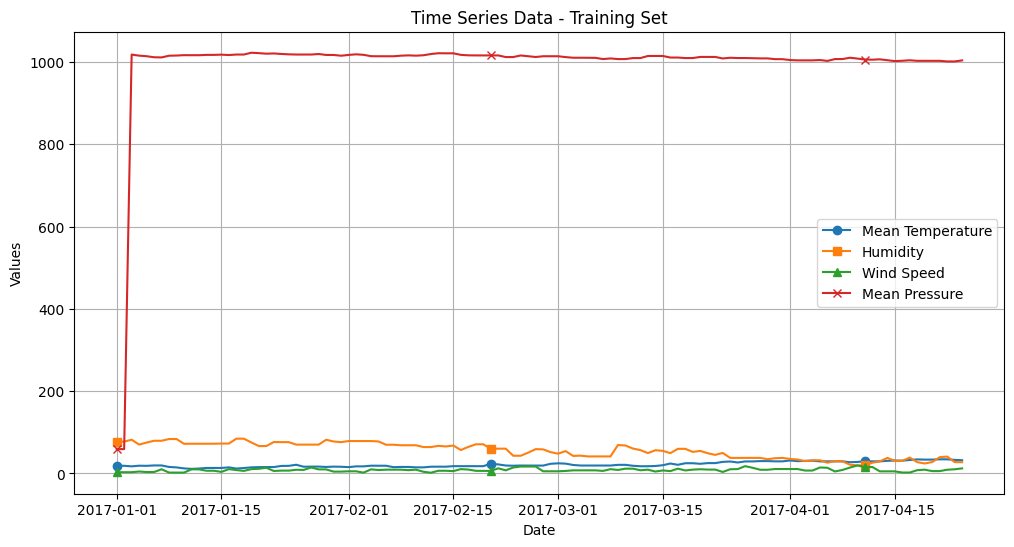

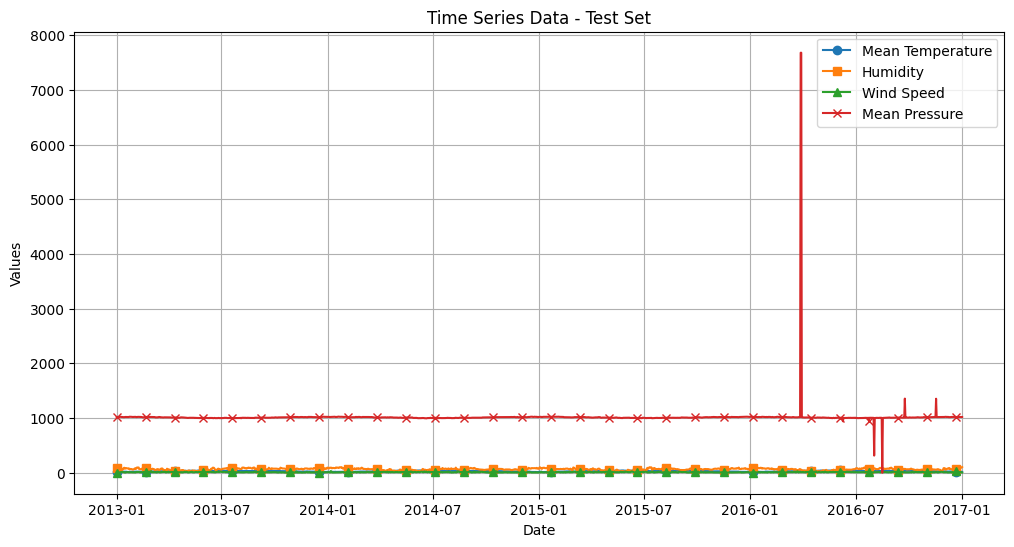

In [375]:
visualize_dataset(df_train.ffill().bfill(), df_test.ffill().bfill())

## Moving Average

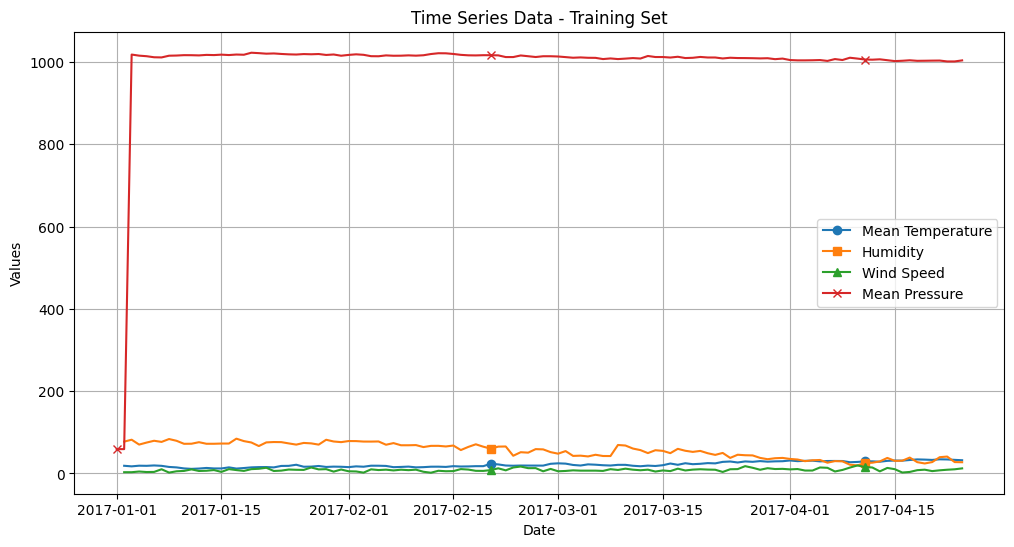

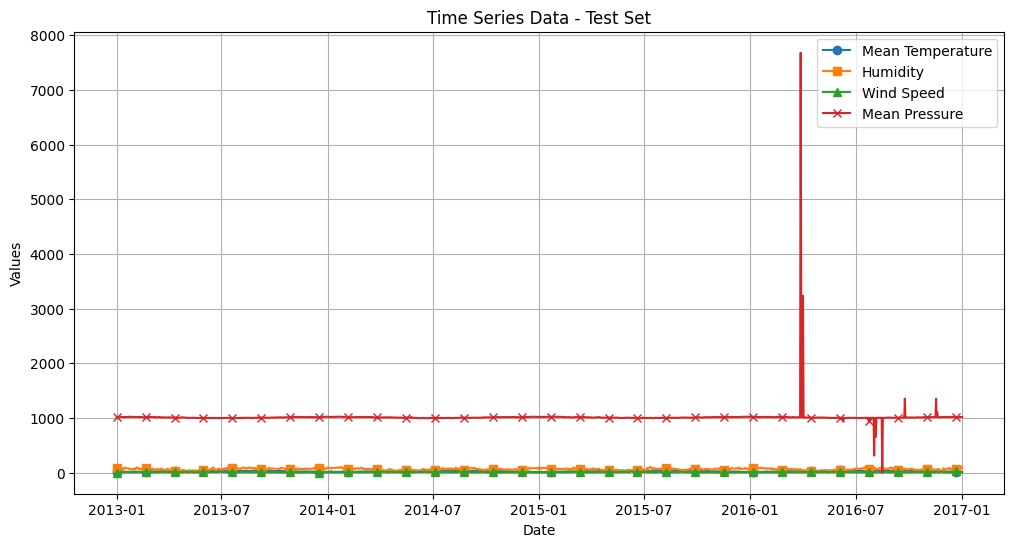

In [376]:
df_train_ma = df_train.apply(lambda x: x.fillna(df_train[x.name].rolling(window=5, min_periods=1).mean()), axis=0)
df_test_ma = df_test.apply(lambda x: x.fillna(df_test[x.name].rolling(window=5, min_periods=1).mean()), axis=0)


visualize_dataset(df_train_ma, df_test_ma)

# 5. Time Series Decomposition

In [377]:
import statsmodels.tsa.seasonal as tsa

df_train = df_train.ffill().bfill()

additive_decomposition_mean_temp = tsa.seasonal_decompose(df_train["meantemp"], model="additive", period=365)
multiplicative_decomposition_mean_temp = tsa.seasonal_decompose(df_train["meantemp"], model="multiplicative", period=365)

additive_decomposition_humidity = tsa.seasonal_decompose(df_train["humidity"], model="additive", period=365)
multiplicative_decomposition_humidity = tsa.seasonal_decompose(df_train["humidity"], model="multiplicative", period=365)

additive_decomposition_meanpressure  = tsa.seasonal_decompose(df_train["meanpressure"], model="additive", period=365)
# multiplicative_decomposition_meanpressure  = tsa.seasonal_decompose(df_train["meanpressure"], model="multiplicative", period=365)

additive_decomposition_wind_speed  = tsa.seasonal_decompose(df_train["wind_speed"], model="additive", period=365)
# multiplicative_decomposition_wind_speed = tsa.seasonal_decompose(df_train["wind_speed"], model="multiplicative", period=365)

## Mean Temp - Seasonal Decompose

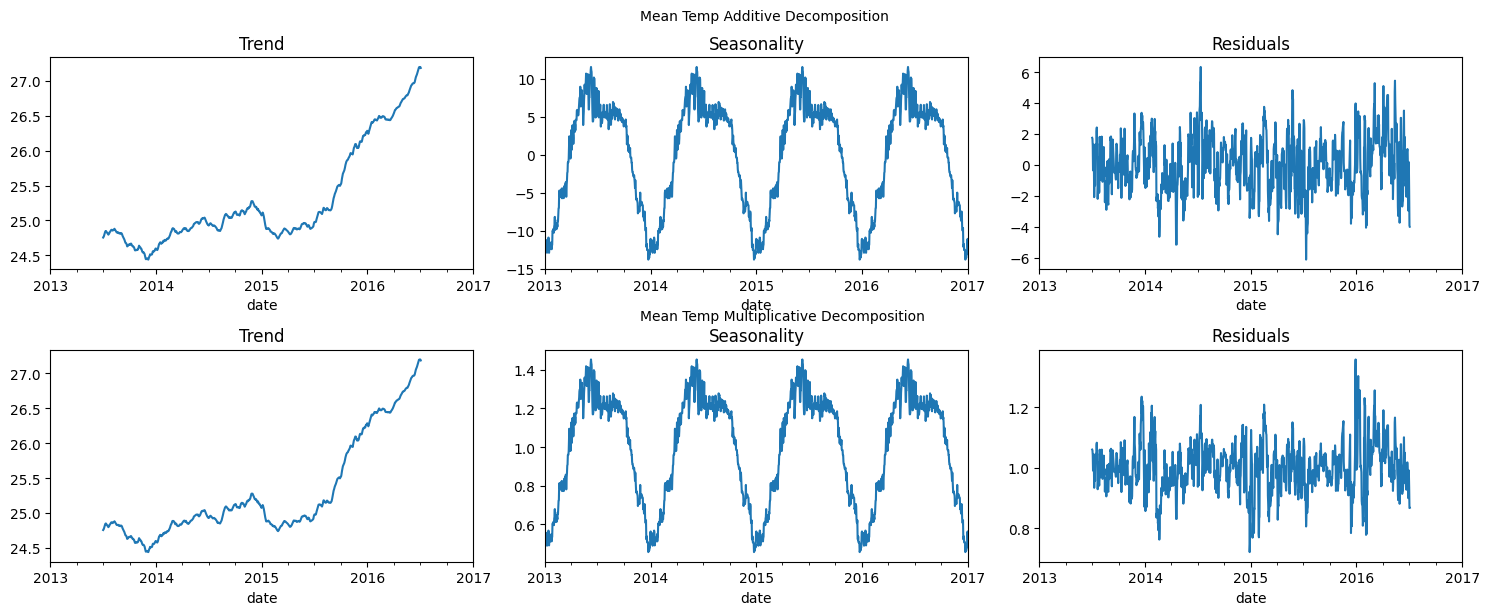

In [378]:

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Additive decomposition plots
additive_decomposition_mean_temp.trend.plot(ax=axes[0, 0], title="Trend")
additive_decomposition_mean_temp.seasonal.plot(ax=axes[0, 1], title="Seasonality")
additive_decomposition_mean_temp.resid.plot(ax=axes[0, 2], title="Residuals")

# Multiplicative decomposition plots
multiplicative_decomposition_mean_temp.trend.plot(ax=axes[1, 0], title="Trend")
multiplicative_decomposition_mean_temp.seasonal.plot(ax=axes[1, 1], title="Seasonality")
multiplicative_decomposition_mean_temp.resid.plot(ax=axes[1, 2], title="Residuals")

fig.text(0.43, 1, s="Mean Temp Additive Decomposition")
fig.text(0.43, 0.5, s="Mean Temp Multiplicative Decomposition")
plt.tight_layout()
plt.show()

## Humidity - Seasonal Decompose

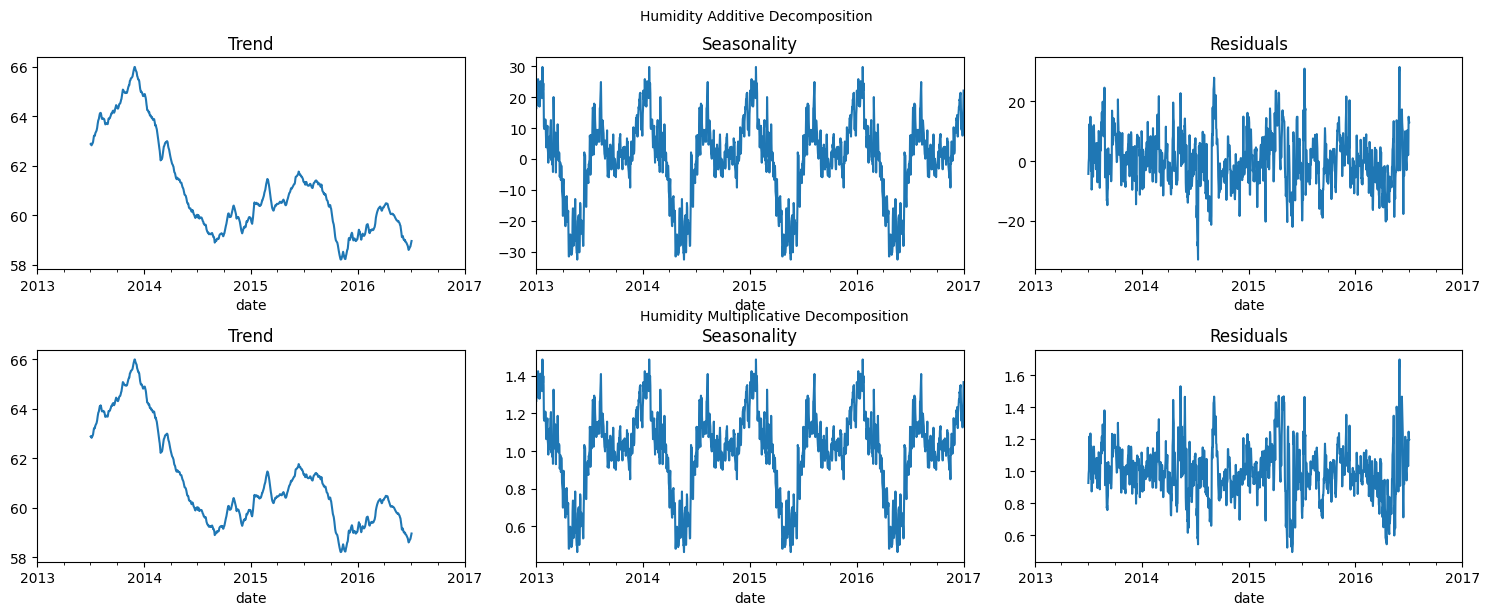

In [379]:

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Additive decomposition plots
additive_decomposition_humidity.trend.plot(ax=axes[0, 0], title="Trend")
additive_decomposition_humidity.seasonal.plot(ax=axes[0, 1], title="Seasonality")
additive_decomposition_humidity.resid.plot(ax=axes[0, 2], title="Residuals")

# Multiplicative decomposition plots
multiplicative_decomposition_humidity.trend.plot(ax=axes[1, 0], title="Trend")
multiplicative_decomposition_humidity.seasonal.plot(ax=axes[1, 1], title="Seasonality")
multiplicative_decomposition_humidity.resid.plot(ax=axes[1, 2], title="Residuals")

fig.text(0.43, 1, s="Humidity Additive Decomposition")
fig.text(0.43, 0.5, s="Humidity Multiplicative Decomposition")
plt.tight_layout()
plt.show()

## Mean Pressure - Seasonal Decompose

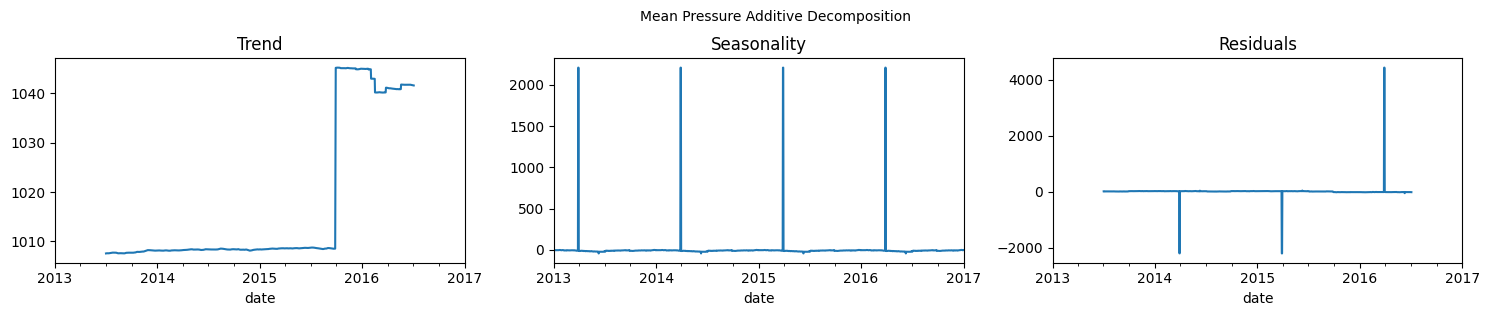

In [380]:

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Additive decomposition plots
additive_decomposition_meanpressure.trend.plot(ax=axes[0], title="Trend")
additive_decomposition_meanpressure.seasonal.plot(ax=axes[1], title="Seasonality")
additive_decomposition_meanpressure.resid.plot(ax=axes[2], title="Residuals")

fig.text(0.43, 1, s="Mean Pressure Additive Decomposition")
plt.tight_layout()
plt.show()

## Wind Speed - Seasonal Decompose

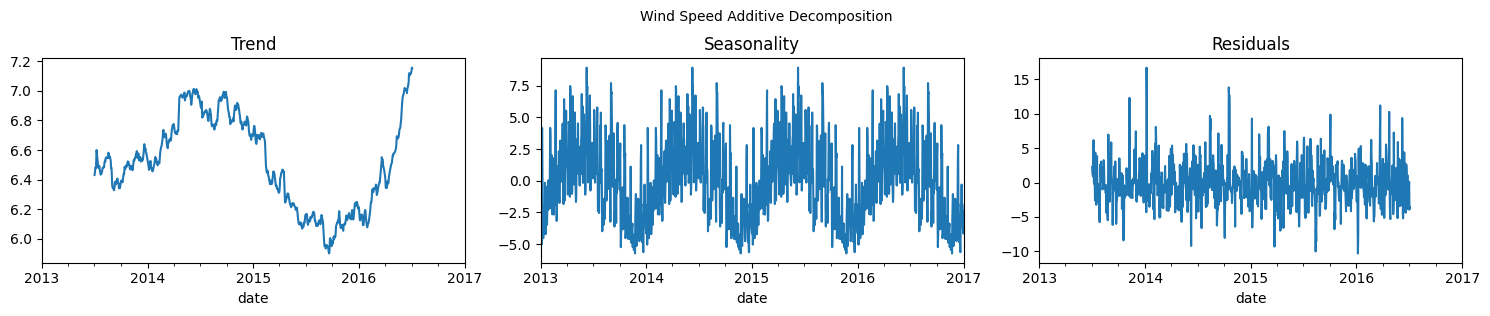

In [381]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# Additive decomposition plots
additive_decomposition_wind_speed.trend.plot(ax=axes[0], title="Trend")
additive_decomposition_wind_speed.seasonal.plot(ax=axes[1], title="Seasonality")
additive_decomposition_wind_speed.resid.plot(ax=axes[2], title="Residuals")

fig.text(0.43, 1, s="Wind Speed Additive Decomposition")
plt.tight_layout()
plt.show()

# 6. Creation of new basic syntethic time series

In [382]:
additive_new_residuals = np.random.normal(loc=0, scale=np.nanstd(additive_decomposition_mean_temp.resid), size=len(additive_decomposition_mean_temp.resid))
additive_synthetic_series = additive_decomposition_mean_temp.trend + additive_decomposition_mean_temp.seasonal + additive_new_residuals
multiplicative_new_residuals = np.random.normal(loc=0, scale=np.nanstd(multiplicative_decomposition_mean_temp.resid), size=len(multiplicative_decomposition_mean_temp.resid))
multiplicative_synthetic_series = multiplicative_decomposition_mean_temp.trend + multiplicative_decomposition_mean_temp.seasonal + multiplicative_new_residuals
new_additive_decomposition_mean_temp = tsa.seasonal_decompose(additive_synthetic_series.bfill().ffill(), model="additive", period=365)
new_multiplicative_decomposition_mean_temp = tsa.seasonal_decompose(multiplicative_synthetic_series.bfill().ffill(), model="multiplicative", period=365)

additive_new_residuals = np.random.normal(loc=0, scale=np.nanstd(additive_decomposition_humidity.resid), size=len(additive_decomposition_humidity.resid))
additive_synthetic_series = additive_decomposition_humidity.trend + additive_decomposition_humidity.seasonal + additive_new_residuals
multiplicative_new_residuals = np.random.normal(loc=0, scale=np.nanstd(multiplicative_decomposition_humidity.resid), size=len(multiplicative_decomposition_humidity.resid))
multiplicative_synthetic_series = multiplicative_decomposition_humidity.trend + multiplicative_decomposition_humidity.seasonal + multiplicative_new_residuals
new_additive_decomposition_humidity = tsa.seasonal_decompose(additive_synthetic_series.bfill().ffill(), model="additive", period=365)
new_multiplicative_decomposition_humidity = tsa.seasonal_decompose(multiplicative_synthetic_series.bfill().ffill(), model="multiplicative", period=365)

additive_new_residuals = np.random.normal(loc=0, scale=np.nanstd(additive_decomposition_meanpressure.resid), size=len(additive_decomposition_meanpressure.resid))
additive_synthetic_series = additive_decomposition_meanpressure.trend + additive_decomposition_meanpressure.seasonal + additive_new_residuals
new_additive_decomposition_meanpressure  = tsa.seasonal_decompose(additive_synthetic_series.bfill().ffill(), model="additive", period=365)

additive_new_residuals = np.random.normal(loc=0, scale=np.nanstd(additive_decomposition_wind_speed.resid), size=len(additive_decomposition_wind_speed.resid))
additive_synthetic_series = additive_decomposition_wind_speed.trend + additive_decomposition_wind_speed.seasonal + additive_new_residuals
new_additive_decomposition_wind_speed  = tsa.seasonal_decompose(additive_synthetic_series.bfill().ffill(), model="additive", period=365)

## Mean Temp - New Seasonal Decompose

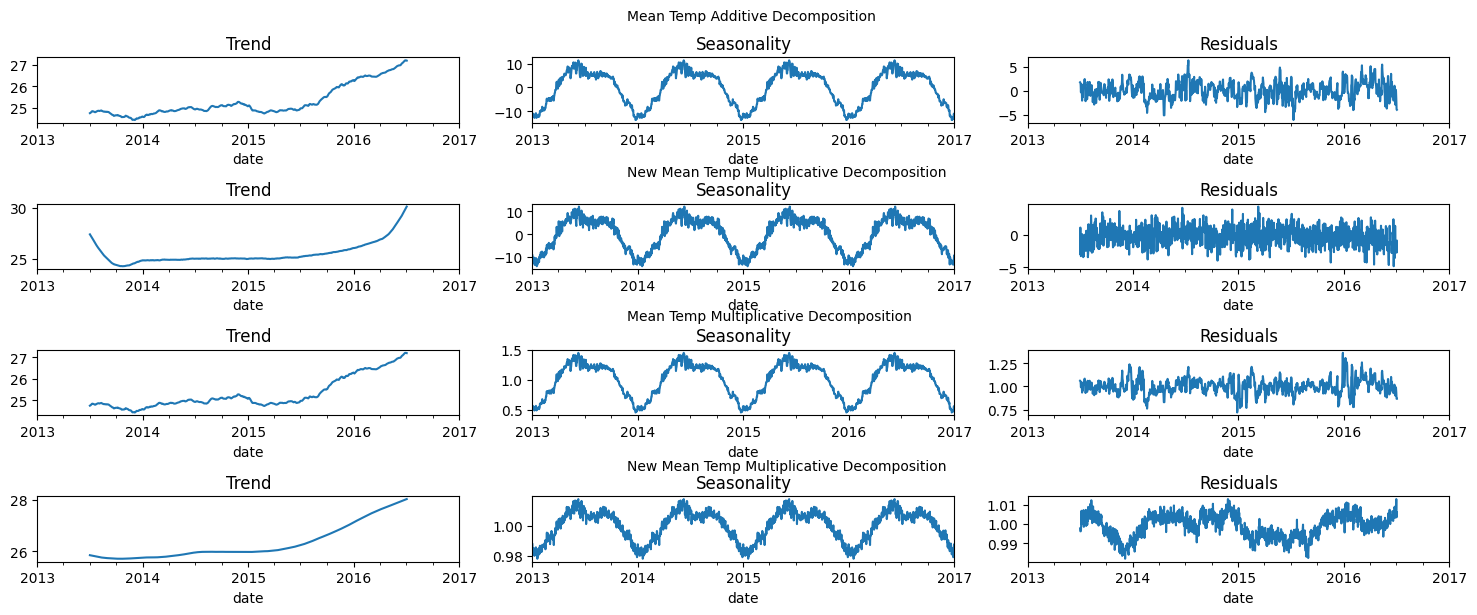

In [383]:

fig, axes = plt.subplots(4, 3, figsize=(15, 6))

# Additive decomposition plots
additive_decomposition_mean_temp.trend.plot(ax=axes[0, 0], title="Trend")
additive_decomposition_mean_temp.seasonal.plot(ax=axes[0, 1], title="Seasonality")
additive_decomposition_mean_temp.resid.plot(ax=axes[0, 2], title="Residuals")
# New Additive decomposition plots
new_additive_decomposition_mean_temp.trend.plot(ax=axes[1, 0], title="Trend")
new_additive_decomposition_mean_temp.seasonal.plot(ax=axes[1, 1], title="Seasonality")
new_additive_decomposition_mean_temp.resid.plot(ax=axes[1, 2], title="Residuals")

# Multiplicative decomposition plots
multiplicative_decomposition_mean_temp.trend.plot(ax=axes[2, 0], title="Trend")
multiplicative_decomposition_mean_temp.seasonal.plot(ax=axes[2, 1], title="Seasonality")
multiplicative_decomposition_mean_temp.resid.plot(ax=axes[2, 2], title="Residuals")
# New Multiplicative decomposition plots
new_multiplicative_decomposition_mean_temp.trend.plot(ax=axes[3, 0], title="Trend")
new_multiplicative_decomposition_mean_temp.seasonal.plot(ax=axes[3, 1], title="Seasonality")
new_multiplicative_decomposition_mean_temp.resid.plot(ax=axes[3, 2], title="Residuals")

fig.text(0.43, 1, s="Mean Temp Additive Decomposition")
fig.text(0.43, 0.74, s="New Mean Temp Multiplicative Decomposition")
fig.text(0.43, 0.50, s="Mean Temp Multiplicative Decomposition")
fig.text(0.43, 0.25, s="New Mean Temp Multiplicative Decomposition")
plt.tight_layout()
plt.show()

## Humidity - New Seasonal Decompose

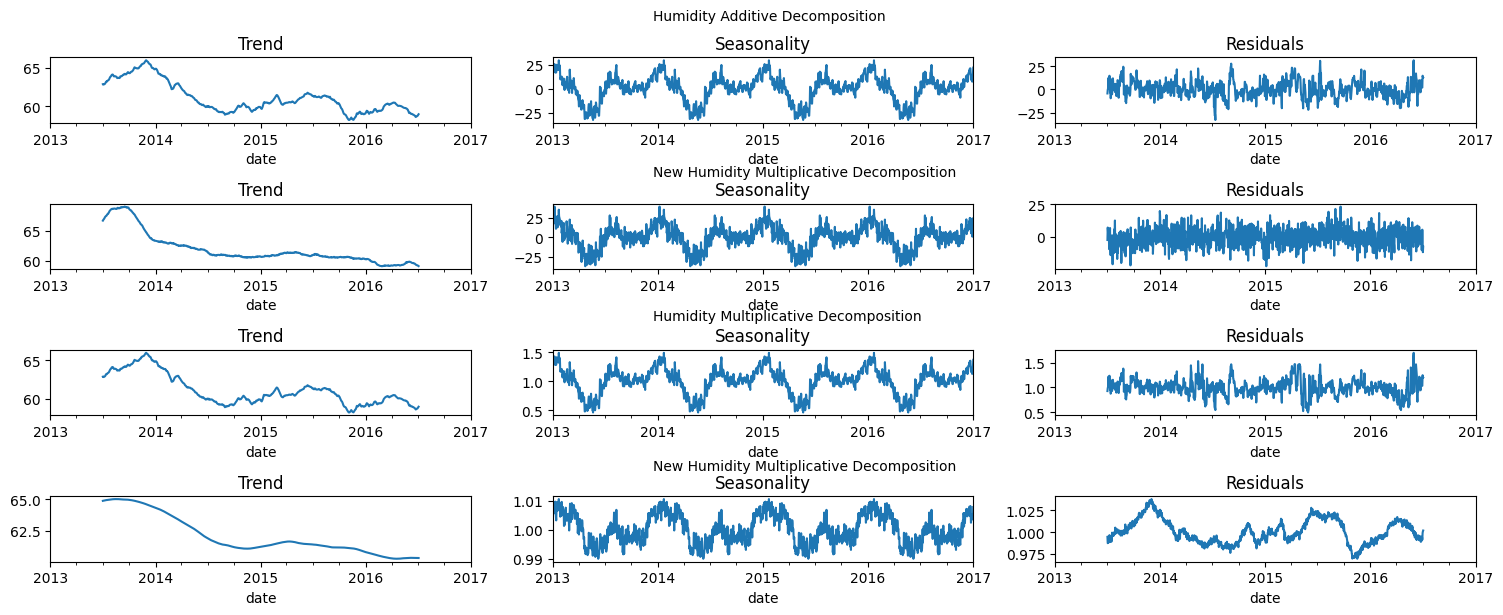

In [384]:

fig, axes = plt.subplots(4, 3, figsize=(15, 6))

# Additive decomposition plots
additive_decomposition_humidity.trend.plot(ax=axes[0, 0], title="Trend")
additive_decomposition_humidity.seasonal.plot(ax=axes[0, 1], title="Seasonality")
additive_decomposition_humidity.resid.plot(ax=axes[0, 2], title="Residuals")
# New Additive decomposition plots
new_additive_decomposition_humidity.trend.plot(ax=axes[1, 0], title="Trend")
new_additive_decomposition_humidity.seasonal.plot(ax=axes[1, 1], title="Seasonality")
new_additive_decomposition_humidity.resid.plot(ax=axes[1, 2], title="Residuals")

# Multiplicative decomposition plots
multiplicative_decomposition_humidity.trend.plot(ax=axes[2, 0], title="Trend")
multiplicative_decomposition_humidity.seasonal.plot(ax=axes[2, 1], title="Seasonality")
multiplicative_decomposition_humidity.resid.plot(ax=axes[2, 2], title="Residuals")
# New Multiplicative decomposition plots
new_multiplicative_decomposition_humidity.trend.plot(ax=axes[3, 0], title="Trend")
new_multiplicative_decomposition_humidity.seasonal.plot(ax=axes[3, 1], title="Seasonality")
new_multiplicative_decomposition_humidity.resid.plot(ax=axes[3, 2], title="Residuals")

fig.text(0.43, 1, s="Humidity Additive Decomposition")
fig.text(0.43, 0.74, s="New Humidity Multiplicative Decomposition")
fig.text(0.43, 0.50, s="Humidity Multiplicative Decomposition")
fig.text(0.43, 0.25, s="New Humidity Multiplicative Decomposition")
plt.tight_layout()
plt.show()

## Mean Pressure - New Seasonal Decompose

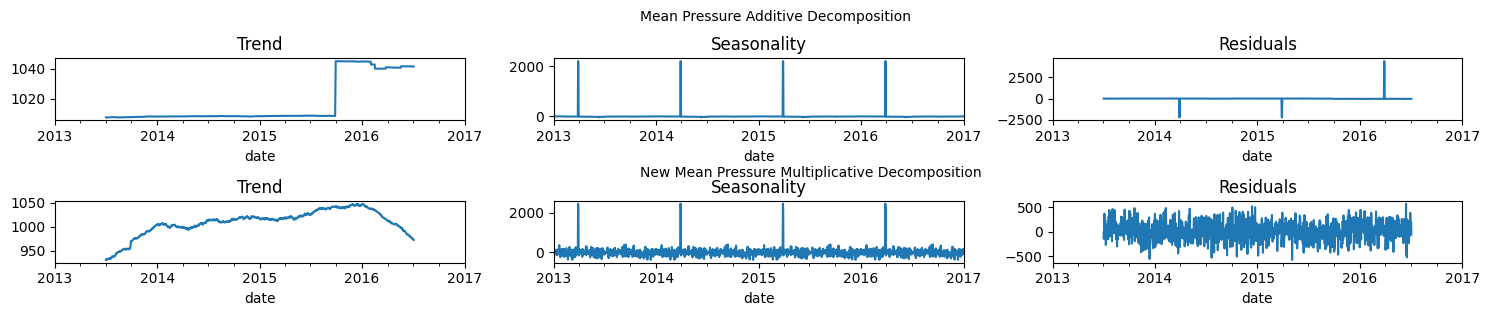

In [385]:

fig, axes = plt.subplots(2, 3, figsize=(15, 3))

# Additive decomposition plots
additive_decomposition_meanpressure.trend.plot(ax=axes[0,0], title="Trend")
additive_decomposition_meanpressure.seasonal.plot(ax=axes[0,1], title="Seasonality")
additive_decomposition_meanpressure.resid.plot(ax=axes[0,2], title="Residuals")
# New Additive decomposition plots
new_additive_decomposition_meanpressure.trend.plot(ax=axes[1,0], title="Trend")
new_additive_decomposition_meanpressure.seasonal.plot(ax=axes[1,1], title="Seasonality")
new_additive_decomposition_meanpressure.resid.plot(ax=axes[1,2], title="Residuals")

fig.text(0.43, 1, s="Mean Pressure Additive Decomposition")
fig.text(0.43, 0.48, s="New Mean Pressure Multiplicative Decomposition")
plt.tight_layout()
plt.show()

# Wind Speed - New Seasonal Decompose

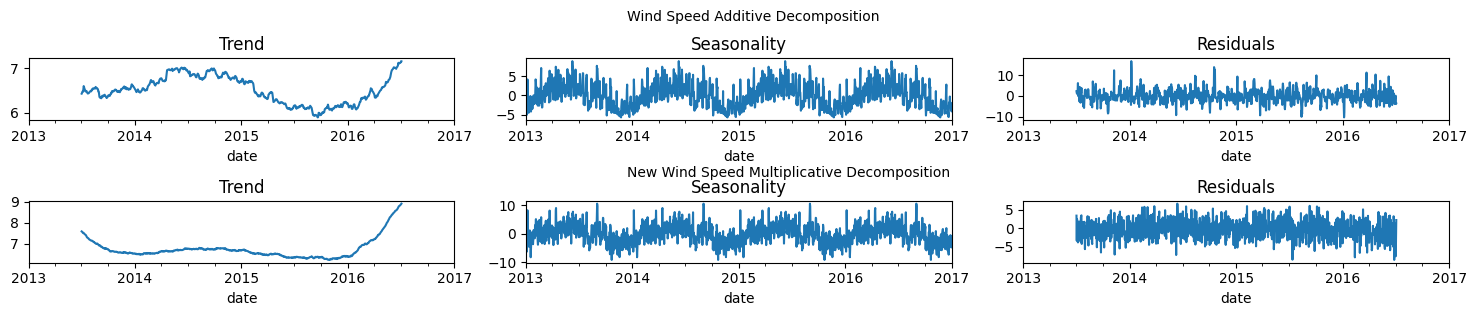

In [386]:
fig, axes = plt.subplots(2, 3, figsize=(15, 3))

# Additive decomposition plots
additive_decomposition_wind_speed.trend.plot(ax=axes[0,0], title="Trend")
additive_decomposition_wind_speed.seasonal.plot(ax=axes[0,1], title="Seasonality")
additive_decomposition_wind_speed.resid.plot(ax=axes[0,2], title="Residuals")
# New Additive decomposition plots
new_additive_decomposition_wind_speed.trend.plot(ax=axes[1,0], title="Trend")
new_additive_decomposition_wind_speed.seasonal.plot(ax=axes[1,1], title="Seasonality")
new_additive_decomposition_wind_speed.resid.plot(ax=axes[1,2], title="Residuals")

fig.text(0.43, 1, s="Wind Speed Additive Decomposition")
fig.text(0.43, 0.48, s="New Wind Speed Multiplicative Decomposition")
plt.tight_layout()
plt.show()